# Week 5 — Session 2 (Hands-On): Perception & Principles

**Goals for this session**  
- Redesign “bad charts” into effective versions (≈30 min)  
- Guided exercise: compare encodings using simulated data (≈20 min)  
- Workshop: bring prior homework plots and improve them (≈15 min)

**Rules for today’s demos**  
- Use `matplotlib` (no seaborn)  
- One chart per figure (no subplots)  
- Avoid specifying colors/styles unless necessary  


## Setup

Run the cell below to import packages and set a small, readable figure size.


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({
    "figure.figsize": (6, 4),
    "axes.grid": False
})

np.random.seed(42)


## Part 1 — Redesign Bad Charts into Effective Versions

For each example:
1. **Bad** version (common pitfalls)
2. **Improved** version (clearer, more honest)

We’ll cover:
- Truncated y-axis vs full scale
- Pie chart for comparison vs bar chart
- Rainbow colormap vs perceptual/sequential colormap
- Chartjunk / clutter vs minimal, data-first


### Example 1A — Bad: Truncated Y-Axis (Exaggerates Differences)

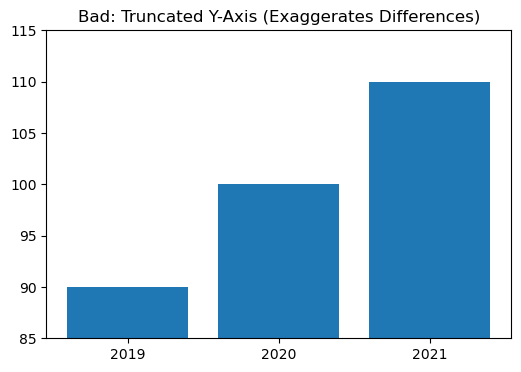

In [20]:
vals = [90, 100, 110]
labels = ["2019", "2020", "2021"]

plt.figure()
plt.bar(labels, vals)
plt.ylim(85, 115)  # TRUNCATED — misleading
plt.title("Bad: Truncated Y-Axis (Exaggerates Differences)")
plt.show()


### Example 1B — Improved: Proper Y-Axis

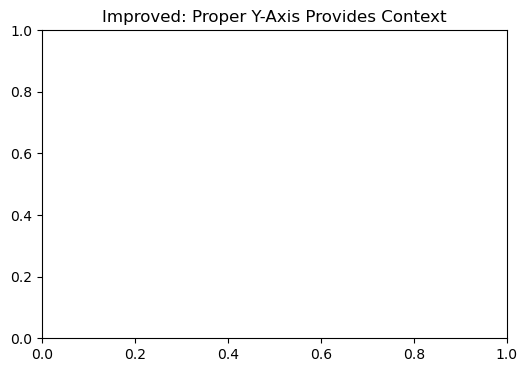

In [21]:
vals = [90, 100, 110]
labels = ["2019", "2020", "2021"]

plt.figure()

plt.title("Improved: Proper Y-Axis Provides Context")
plt.show()


### Example 2A — Bad: Pie Chart for Precise Comparison

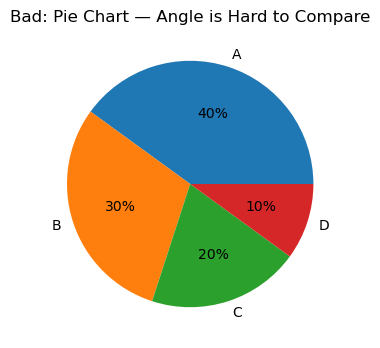

In [22]:
sizes = [40, 30, 20, 10]
labels = ["A", "B", "C", "D"]

plt.figure()
plt.pie(sizes, labels=labels, autopct="%1.0f%%")
plt.title("Bad: Pie Chart — Angle is Hard to Compare")
plt.show()


### Example 2B — Improved: Bar Chart (Length/Position is Easier)

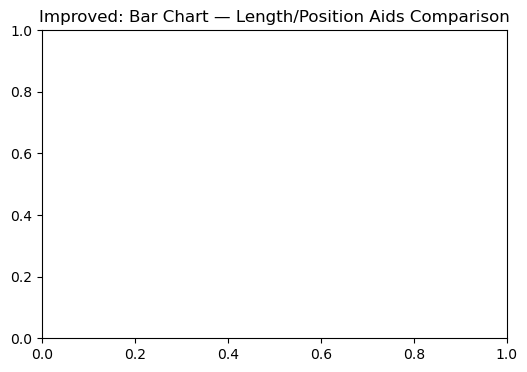

In [23]:
sizes = [40, 30, 20, 10]
labels = ["A", "B", "C", "D"]

plt.figure()


plt.title("Improved: Bar Chart — Length/Position Aids Comparison")
plt.show()


### Example 3A — Bad: Rainbow (Jet) Colormap

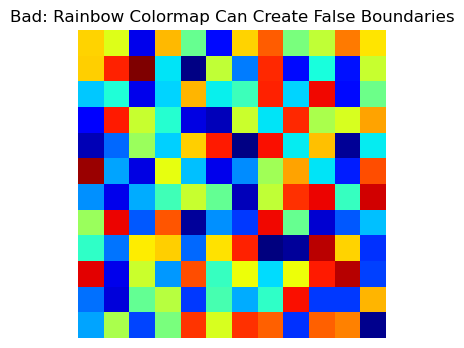

In [24]:
# synthetic heatmap-like data
M = np.random.randint(50, 200, size=(12, 12))

plt.figure()
plt.imshow(M, cmap="jet")
plt.title("Bad: Rainbow Colormap Can Create False Boundaries")
plt.axis("off")
plt.show()


### Example 3B — Improved: Sequential Colormap

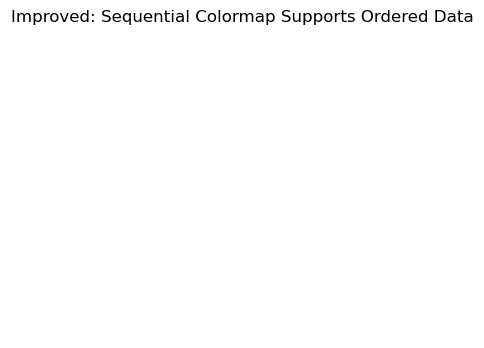

In [25]:
M = np.random.randint(50, 200, size=(12, 12))

plt.figure()

plt.title("Improved: Sequential Colormap Supports Ordered Data")
plt.axis("off")
plt.show()


### Example 4A — Bad: Chartjunk (Clutter & Unnecessary Ink)

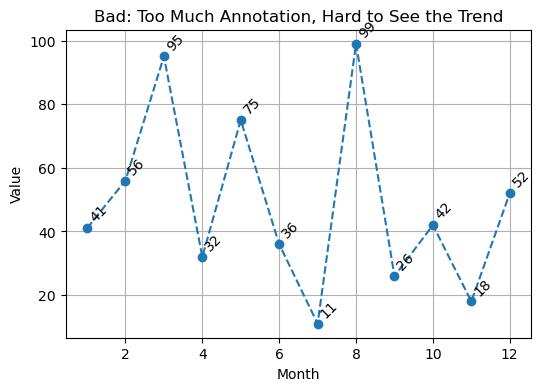

In [26]:
x = np.arange(1, 12+1)
y = np.random.randint(10, 100, size=12)

plt.figure()
plt.plot(x, y, marker="o", linestyle="--")
# Over-annotate every point
for xi, yi in zip(x, y):
    plt.text(xi, yi + 2, str(yi), rotation=45)
plt.title("Bad: Too Much Annotation, Hard to See the Trend")
plt.xlabel("Month")
plt.ylabel("Value")
plt.grid(True)
plt.show()


### Example 4B — Improved: Minimal, Data-First Design

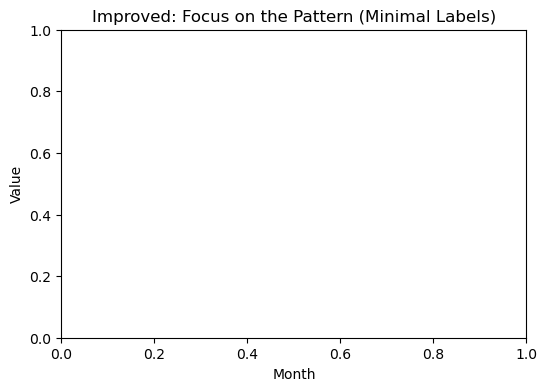

In [27]:
x = np.arange(1, 12+1)
y = np.random.randint(10, 100, size=12)

plt.figure()


plt.title("Improved: Focus on the Pattern (Minimal Labels)")
plt.xlabel("Month")
plt.ylabel("Value")
plt.show()


## Part 2 — Guided Exercise: Compare Encodings Using Simulated Data

We’ll generate a small dataset and show how different encodings affect readability/accuracy.
- Angle (pie) vs length (bar)
- Area (bubble) vs position (bar/line)
- Color hue vs position

**Prompt for discussion:** Which plot makes it easiest to rank categories or detect small differences?


### Generate Simulated Data

In [53]:
np.random.seed(123)
cats = np.array(list("ABCDE"))
vals = np.random.randint(20, 80, size=len(cats))

data = pd.DataFrame({"category": cats, "value": vals}).sort_values("value", ascending=False)
data


,category,value
0,A,65
4,E,58
3,D,54
2,C,48
1,B,22


### Encoding: Angle (Pie)

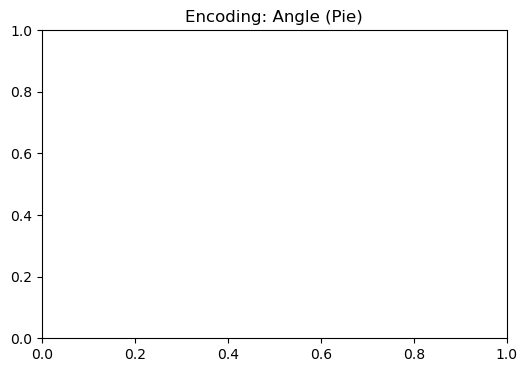

In [54]:
plt.figure()

plt.title("Encoding: Angle (Pie)")
plt.show()


### Encoding: Length (Bar)

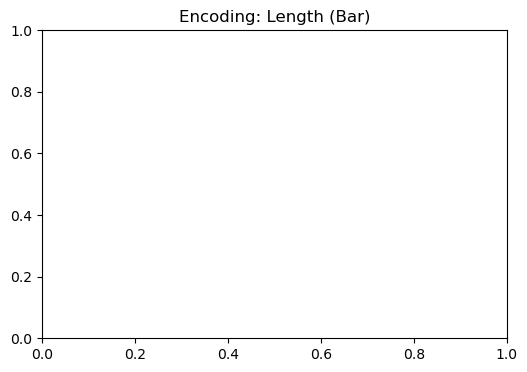

In [55]:
plt.figure()


plt.title("Encoding: Length (Bar)")
plt.show()


### Encoding: Area (Bubble)

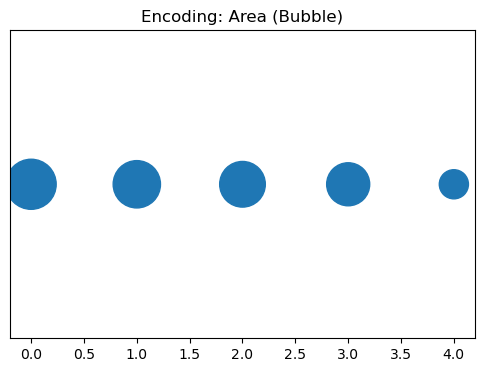

In [56]:
# Bubble sizes proportional to value (area encoding)
plt.figure()

plt.scatter(np.arange(len(data)), [1]*len(data), s=data["value"]*20)

# plt.xticks(np.arange(len(data)), data["category"])

plt.yticks([])
plt.title("Encoding: Area (Bubble)")
plt.show()


### Encoding: Position (Line, Sorted by Value)

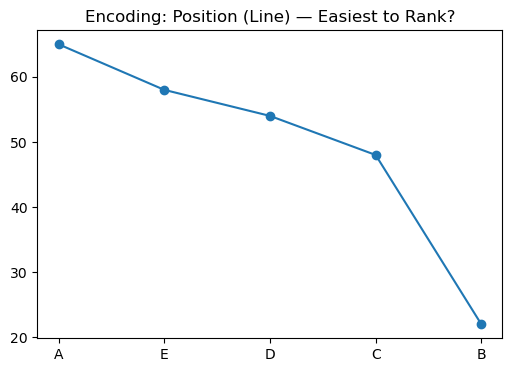

In [57]:
plt.figure()
plt.plot(np.arange(len(data)), data["value"], marker="o")
plt.xticks(np.arange(len(data)), data["category"])



plt.title("Encoding: Position (Line) — Easiest to Rank?")
plt.show()


### Encoding: Color Hue vs Position (Demo)

Color hue is **not** ordered; use position/length for ranking tasks.  
*(We avoid specifying colors explicitly in this session.)*


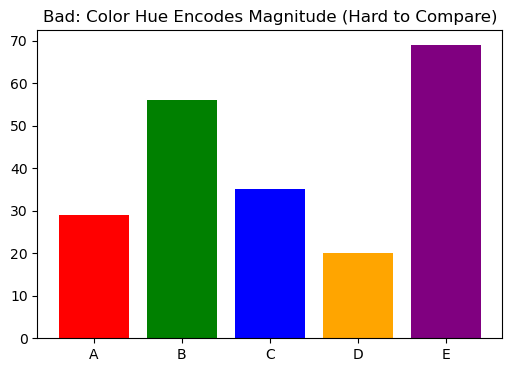

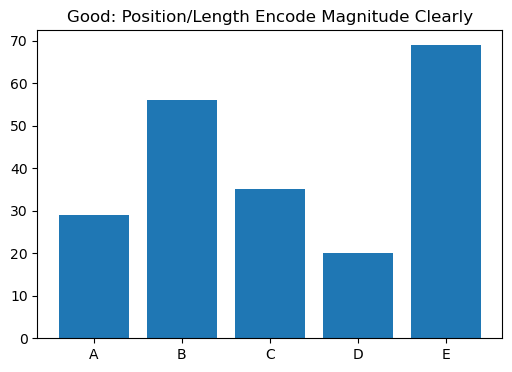

In [58]:
# Simulated data
np.random.seed(10)
cats = np.array(list("ABCDE"))
vals = np.random.randint(20, 80, size=len(cats))

# Bad: using color hue for ordinal comparison
plt.figure()
plt.bar(cats, vals, color=["red", "green", "blue", "orange", "purple"])
plt.title("Bad: Color Hue Encodes Magnitude (Hard to Compare)")
plt.show()

# Good: using position/length
plt.figure()
plt.bar(cats, vals)
plt.title("Good: Position/Length Encode Magnitude Clearly")
plt.show()


## Part 3 — Workshop (Bring & Improve Your Own Plots)

**Instructions**
1. Paste your prior homework chart code below (or load your saved figure/data).
2. Identify at least **one issue** (e.g., truncated axis, pie for comparisons, rainbow colormap, chartjunk).
3. Produce an **improved** version using today’s principles.
4. Briefly explain the change in 1–2 sentences.


### Your Original (or Reconstructed) Plot — Paste Below

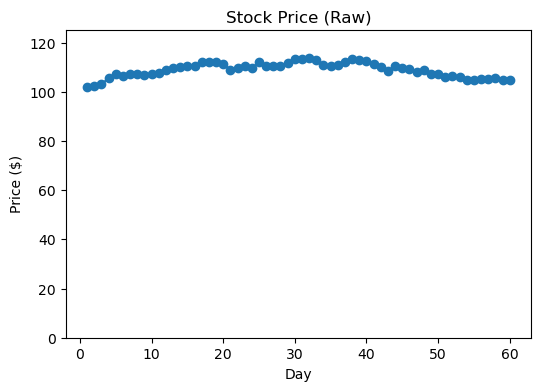

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate stock price series
np.random.seed(0)
days = np.arange(1, 61)
price = 100 + np.cumsum(np.random.normal(0, 1, size=len(days)))  # small fluctuations around 100

# 1. Standard line plot
plt.figure(figsize=(6,4))
plt.plot(days, price, marker="o")
plt.ylim(0, max(price) * 1.1)
plt.title("Stock Price (Raw)")
plt.xlabel("Day")
plt.ylabel("Price ($)")
plt.show()


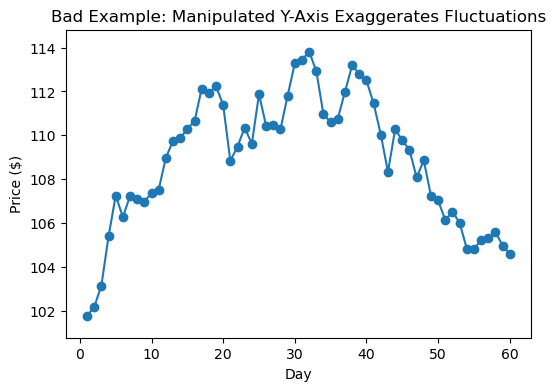

In [61]:
plt.figure(figsize=(6,4))
plt.plot(days, price, marker="o")
plt.ylim(price.min() - 1, price.max() + 1)  # artificially narrow range
plt.title("Bad Example: Manipulated Y-Axis Exaggerates Fluctuations")
plt.xlabel("Day")
plt.ylabel("Price ($)")
plt.show()

### Your Improved Plot — Apply Fixes

In [ ]:
normalized = ??

plt.figure(figsize=(6,4))
plt.plot(days, normalized, marker="o")
plt.title("Normalized Stock Price (% Change from Day 1)")
plt.xlabel("Day")
plt.ylabel("Percent Change (%)")
plt.show()

### One more example

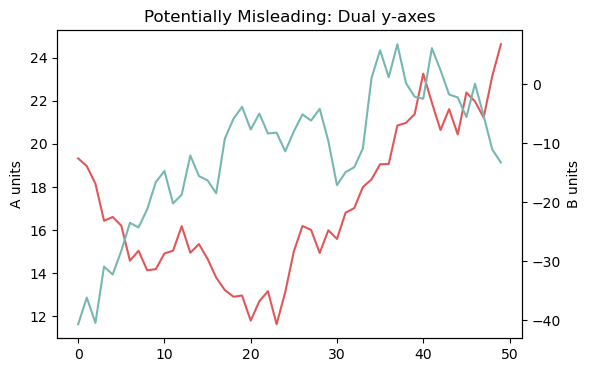

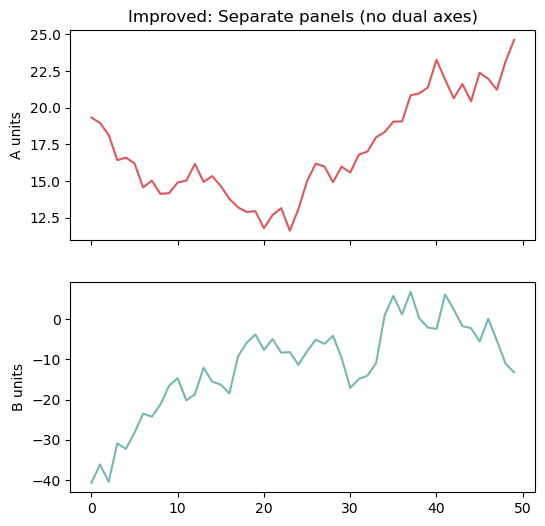

In [63]:
x = np.arange(50)
series1 = np.cumsum(np.random.randn(50)) + 20
series2 = (np.cumsum(np.random.randn(50)) - 10) * 5

fig, ax1 = plt.subplots(figsize=(6,4))
ax2 = ax1.twinx()
ax1.plot(x, series1, color='#e15759', label='Series A')
ax2.plot(x, series2, color='#76b7b2', label='Series B')
ax1.set_title("Potentially Misleading: Dual y-axes")
ax1.set_ylabel("A units"); ax2.set_ylabel("B units")
plt.show()

# Improved: Faceted panels with shared x
fig, (axA, axB) = plt.subplots(2,1, figsize=(6,6), sharex=True)
axA.plot(x, series1, color='#e15759'); axA.set_ylabel("A units")
axB.plot(x, series2, color='#76b7b2'); axB.set_ylabel("B units")
axA.set_title("Improved: Separate panels (no dual axes)")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(50)
series1 = np.cumsum(np.random.randn(50)) + 20
series2 = (np.cumsum(np.random.randn(50)) - 10) * 5

# Normalize relative to first value
s1_norm = 
s2_norm = 

plt.figure(figsize=(6,4))
plt.plot(x, s1_norm, label="Series A")
plt.plot(x, s2_norm, label="Series B")
plt.title("Comparison on Single Y-axis (Normalized % Change)")
plt.xlabel("Time")
plt.ylabel("Percent Change (%)")
plt.legend()
plt.show()

### Quick Checklist (Mark Down Your Decisions)

- [ ] Is the **y-axis** starting at zero when appropriate?
- [ ] Did you avoid **rainbow/jet** colormap for ordered data?
- [ ] Is the chosen **encoding** appropriate for the reading task?
- [ ] Did you remove **unnecessary clutter** (chartjunk)?
- [ ] If comparing parts-to-whole, did you consider alternatives to **pie**?
- [ ] Are **labels** and **units** clear and concise?
